In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('../resources/twitter_sentiment_data_raw.csv', encoding='latin1')
df.shape
golden = df[df['_golden'] == True]
print(f'"Golden": {golden.shape[0]}/7156 - {round(golden.shape[0]/7156,4)}%')

relevant = df[df['sentiment'] != 'not_relevant']
print(f'"Relevant": {relevant.shape[0]}/7156 - {round(relevant.shape[0]/7156,4)}%')

"Golden": 75/7156 - 0.0105%
"Relevant": 6943/7156 - 0.9702%


In [6]:
df.head(20)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,our_id,sentiment_gold,sentiment_gold_reason,text
0,724227031,True,golden,236,NaN,5,0.7579,10001,5\n4,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,724227032,True,golden,231,NaN,5,0.8775,10002,5\n4,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,724227033,True,golden,233,NaN,2,0.6805,10003,2\n1,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,724227034,True,golden,240,NaN,2,0.8820,10004,2\n1,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
4,724227035,True,golden,240,NaN,3,1.0000,10005,3,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...
5,724227036,True,golden,241,NaN,3,1.0000,10006,3,Author is asking a question without expressing...,Will driverless cars eventually replace taxi d...
6,724227037,True,golden,226,NaN,not_relevant,0.5367,10007,not_relevant,Trains (metros) are not relevant to the focus ...,Chicago metro expected to be fully autonomous ...
7,724227038,True,golden,241,NaN,not_relevant,0.6548,10008,not_relevant,Author is not referring to self-driving cars. ...,I love the infotainment system in my new car. ...
8,724227039,True,golden,238,NaN,5,0.7187,10009,5\n4,Shows excitement that autonomous vehicles will...,Autonomous vehicles could reduce traffic fatal...
9,724227040,True,golden,230,NaN,1,0.6412,10010,2\n1,Shows fear that driverless cars will not be sa...,Driverless cars are not worth the risk. Don't...


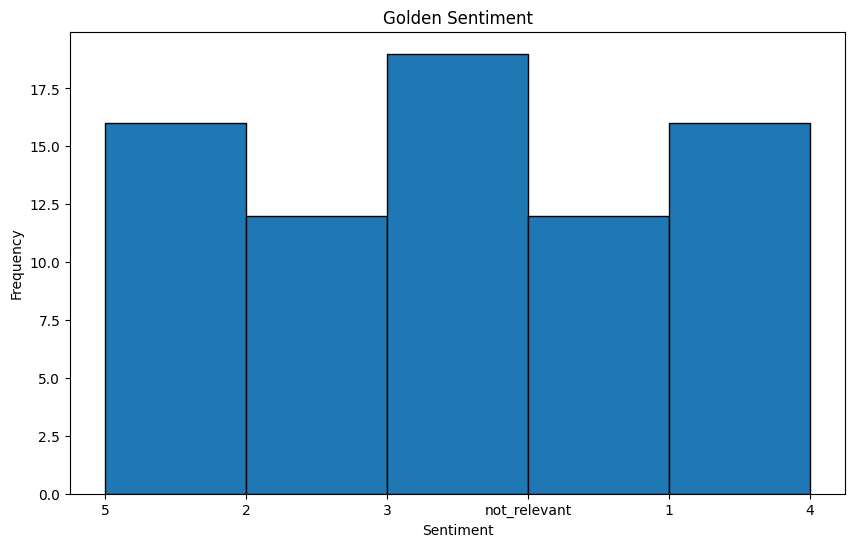

In [53]:

plt.figure(figsize=(10, 6))
golden['sentiment'].hist(bins=5, edgecolor='black')
plt.title('Golden Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

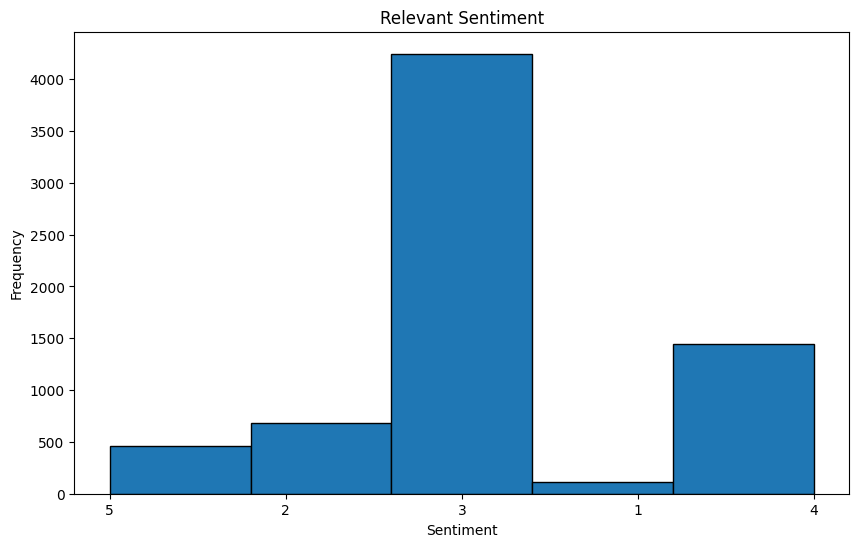

In [54]:

plt.figure(figsize=(10, 6))
relevant['sentiment'].hist(bins=5, edgecolor='black')
plt.title('Relevant Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

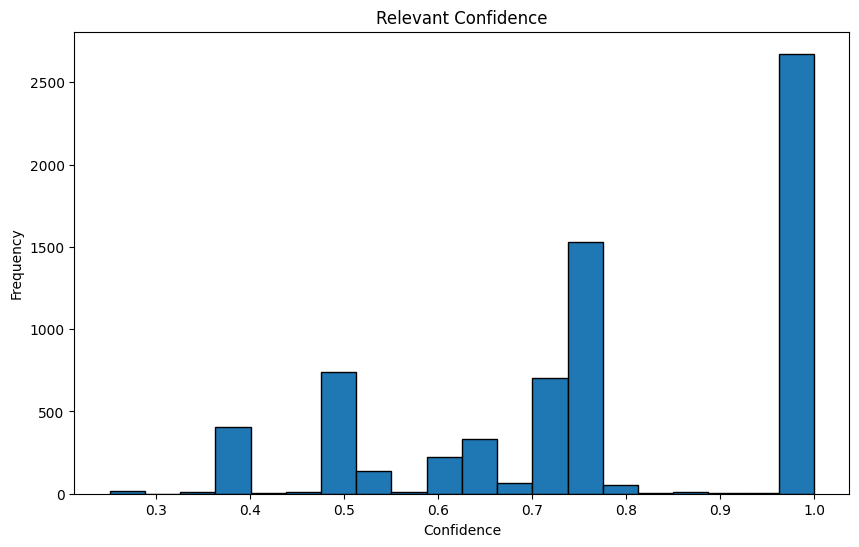

In [55]:
plt.figure(figsize=(10, 6))
relevant['sentiment:confidence'].hist(bins=20, edgecolor='black')
plt.title('Relevant Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

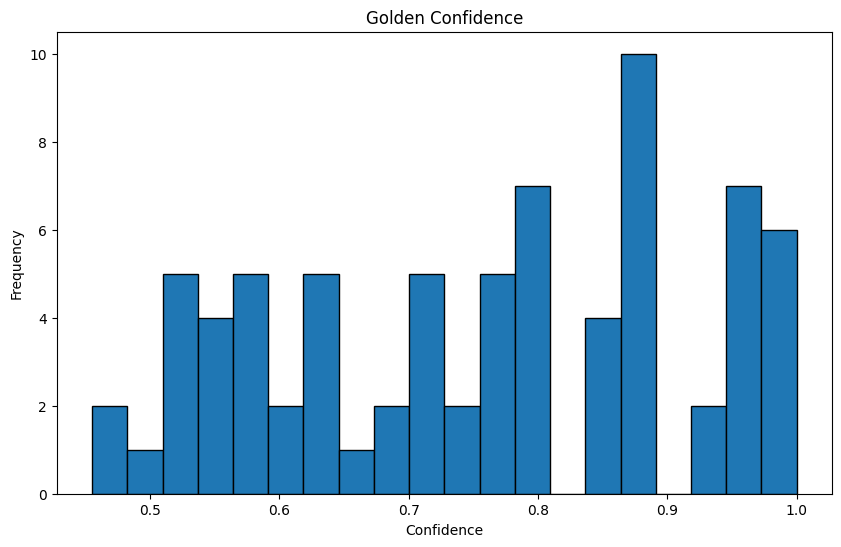

In [56]:
plt.figure(figsize=(10, 6))
golden['sentiment:confidence'].hist(bins=20, edgecolor='black')
plt.title('Golden Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

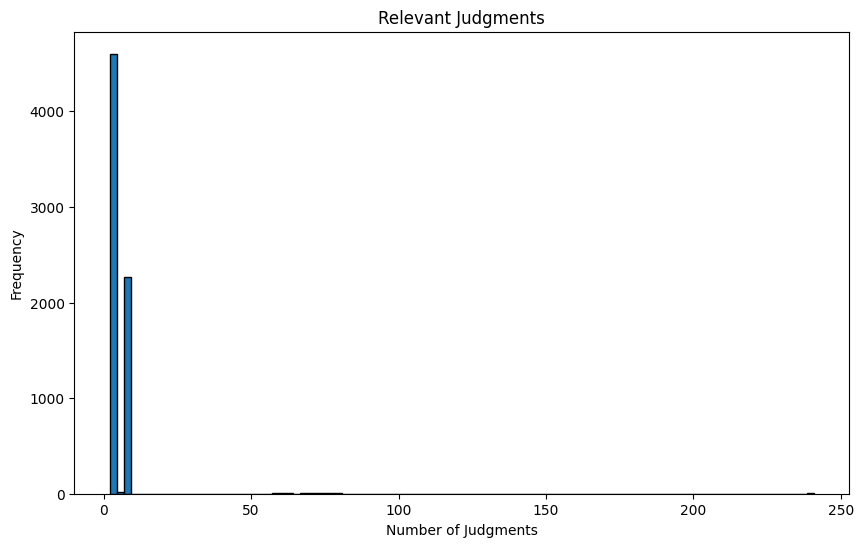

In [57]:
plt.figure(figsize=(10, 6))
relevant['_trusted_judgments'].hist(bins=100, edgecolor='black')
plt.title('Relevant Judgments')
plt.xlabel('Number of Judgments')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

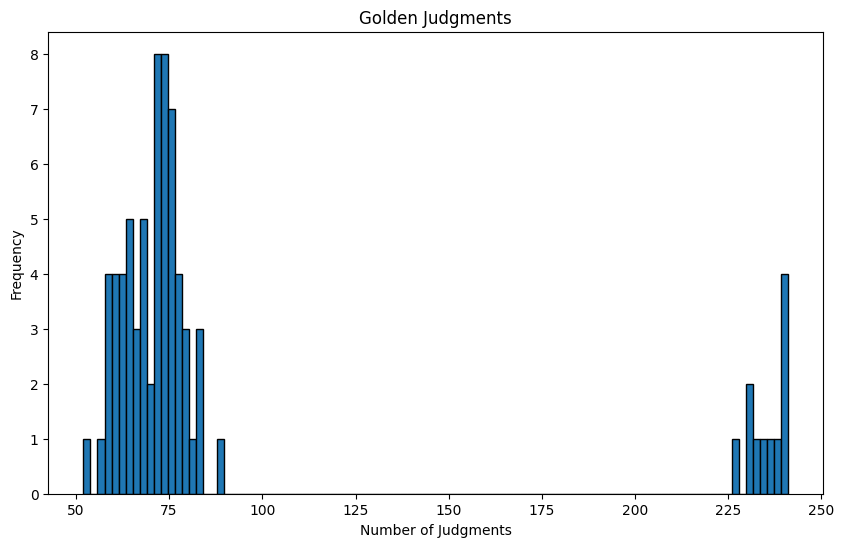

In [58]:
plt.figure(figsize=(10, 6))
golden['_trusted_judgments'].hist(bins=100, edgecolor='black')
plt.title('Golden Judgments')
plt.xlabel('Number of Judgments')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [17]:
def is_positive(sentiment):
    if sentiment in ["4", "5"]:
        return 1
    elif sentiment in ["1", "2"]:
        return 0
    else:
        return None 

pre_processed = df.drop(columns=["_unit_id", "_unit_state", "_trusted_judgments", "_golden", "_last_judgment_at", "our_id","sentiment_gold","sentiment_gold_reason"])
pre_processed = pre_processed[(pre_processed['sentiment'] != '3') & (pre_processed['sentiment'] != 'not_relevant')]
pre_processed['is_positive'] = pre_processed['sentiment'].apply(is_positive)
pre_processed.drop(columns=['sentiment','sentiment:confidence'], inplace=True)
pre_processed.shape

(2698, 2)

In [18]:
pre_processed.head()

,text,is_positive
0,Two places I'd invest all my money if I could:...,1
1,Awesome! Google driverless cars will help the ...,1
2,If Google maps can't keep up with road constru...,0
3,Autonomous cars seem way overhyped given the t...,0
8,Autonomous vehicles could reduce traffic fatal...,1


In [19]:
pre_processed.to_csv('../resources/preprocessed_sentiment.csv')

In [20]:
word_counts = pre_processed['text'].apply(lambda x: len(str(x).split()))

# Find the maximum word count
max_word_count = word_counts.max()

print('Maximum word count:', max_word_count)

Maximum word count: 31
